### Six cells in signature matrix (LM6)
1. Neutrophils
2. Monocytes
3. B cells
4. CD8 T cells
5. CD4 T cells
6. NK cells

In [1]:
Base_dir = 'C:/github/LiverDeconv' # cloning repository

import sys
sys.path.append(Base_dir)
import liver_deconv

import pandas as pd

***
#### 1. Reference preparation

In [2]:
# load data
df_mix = pd.read_csv(Base_dir+'/data/processed/mix_processed.csv',index_col=0)
df_all = pd.read_csv(Base_dir+'/data/processed/ref_13types.csv',index_col=0)

target_cells = ["Neutrophil","Monocyte","B","CD8","CD4","NK"]
use_samples = []
for t in df_all.columns.tolist():
    if t.split("_")[0] in target_cells:
        use_samples.append(t)
df_target = df_all[use_samples]
print(df_mix.shape)
df_mix.head()

(11588, 57)


,ANIT_1,ANIT_2,ANIT_3,ANIT_4,APAP_1,APAP_11,APAP_2,APAP_4,APAP_6,APAP_8,...,MDA_8,TAA_1,TAA_3,TAA_6,TAA_7,TAA_8,GAL_2,GAL_4,GAL_7,GAL_8
0610005C13Rik,11.875867,12.148424,11.252824,12.411776,11.733585,11.068134,11.748217,11.856797,12.010466,11.216230,...,12.134986,10.641326,10.482294,10.242923,10.101400,9.562121,9.941478,8.431683,7.700966,8.962926
0610009B22Rik,8.734242,8.457720,8.184438,8.506085,7.542759,8.233699,8.699826,8.748106,8.434342,7.651400,...,8.247180,7.936489,8.039019,7.926510,7.985361,7.755954,8.767225,8.663929,8.546301,8.989601
0610010F05Rik,6.490900,6.421802,5.806085,6.462369,5.565017,6.059207,5.922221,5.990138,5.467135,5.755073,...,6.552560,6.950840,6.120020,6.206200,6.356350,6.086378,4.909432,6.207227,6.382519,6.357380
0610010K14Rik,8.564556,8.673014,8.348932,8.224936,9.066347,8.904317,8.386174,8.778923,8.426116,9.441442,...,8.122928,8.779766,9.291585,9.132055,9.200938,9.173803,9.273967,8.512630,8.407845,8.454941
0610012G03Rik,8.097187,7.933714,7.698964,7.900242,8.162186,7.959631,7.644485,7.770003,8.080504,8.389386,...,7.740478,8.486990,8.506687,7.844173,7.849986,7.853950,8.150181,8.108420,7.913200,8.247160


In [3]:
print(df_mix.columns.tolist())

['ANIT_1', 'ANIT_2', 'ANIT_3', 'ANIT_4', 'APAP_1', 'APAP_11', 'APAP_2', 'APAP_4', 'APAP_6', 'APAP_8', 'Ctrl_1', 'Ctrl_10', 'Ctrl_12', 'Ctrl_15', 'Ctrl_16', 'Ctrl_17', 'Ctrl_18', 'Ctrl_2', 'Ctrl_3', 'Ctrl_4', 'CCl4_1', 'CCl4_10', 'CCl4_11', 'CCl4_12', 'CCl4_5', 'CCl4_6', 'CCl4_8', 'Ctrl_7', 'Ctrl_8', 'Ctrl_9', 'ConA_11', 'ConA_12', 'ConA_2', 'ConA_3', 'ConA_4', 'ConA_5', 'ConA_8', 'CIP_7', 'CIP_8', 'CIV_7', 'CIV_8', 'MDA_1', 'MDA_2', 'MDA_3', 'MDA_4', 'MDA_12', 'MDA_7', 'MDA_8', 'TAA_1', 'TAA_3', 'TAA_6', 'TAA_7', 'TAA_8', 'GAL_2', 'GAL_4', 'GAL_7', 'GAL_8']


In [4]:
print(df_target.shape)
df_target.head()

(51463, 62)


,NK_GSE114827_1,NK_GSE114827_2,NK_GSE114827_3,NK_GSE103901_1,NK_GSE103901_2,NK_GSE103901_3,NK_GSE103901_4,NK_GSE103901_5,B_GSE84878_1,B_GSE84878_2,...,Neutrophil_GSE142432_1,Neutrophil_GSE142432_2,Neutrophil_GSE142432_3,Neutrophil_GSE142432_4,Neutrophil_GSE142432_5,Neutrophil_GSE142432_6,Neutrophil_GSE116177_1,Neutrophil_GSE116177_3,Neutrophil_GSE116177_4,Neutrophil_GSE116177_5
mgi,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,11.216826,23.474148,0.987152,15.364877,31.139537,22.703545,20.156833,29.162144,0.612939,1.192251,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610006L08Rik,0.000000,0.000000,0.000000,0.000000,0.000000,2.532700,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610009B22Rik,3801.734228,3838.271735,590.980263,1673.625997,1265.782913,660.394232,596.272184,641.598858,424.297827,489.444747,...,199.404926,181.350632,130.181362,129.996658,150.657197,186.401670,15.561699,38.279541,57.820415,94.807015
0610009E02Rik,38.492335,26.822363,9.531486,31.225440,5.380941,25.955692,27.520060,22.481986,30.104838,24.581738,...,0.000000,14.081322,9.474898,1.169916,6.797626,15.915817,0.000000,0.000000,4.942000,3.985286
0610009L18Rik,260.189214,144.910984,115.846603,639.627003,664.538873,333.376854,357.646002,390.423509,71.599094,72.398348,...,97.994038,139.164590,109.787082,84.704616,64.528851,97.266329,10.357186,31.516220,79.932081,64.016914


(11588, 57)
(51463, 62)
log2 conversion
quantile normalization
drop nan
narrowd gene number : 11490
signature genes : 300


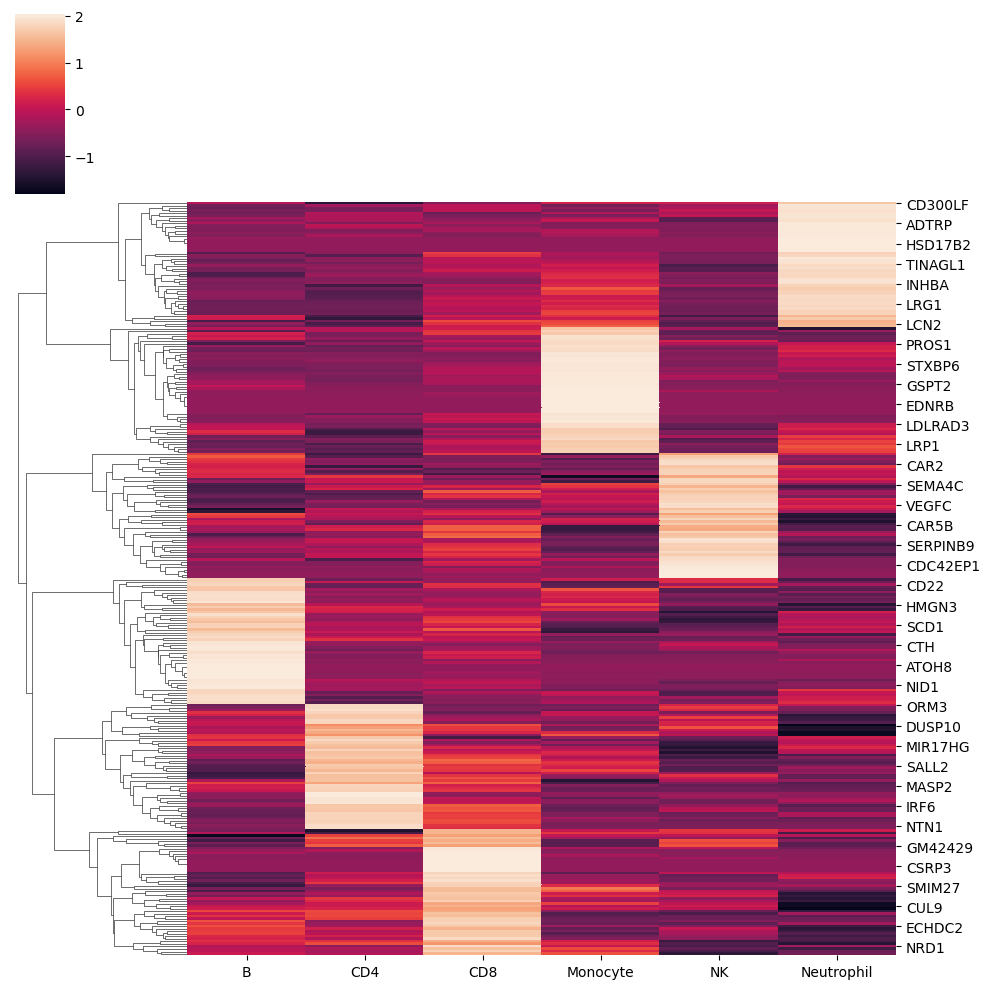

In [5]:
dat = liver_deconv.LiverDeconv()
dat.set_data(df_mix=df_mix, df_all=df_target)
dat.pre_processing(do_ann=False,ann_df=None,do_log2=True,do_quantile=True,do_trimming=False,do_drop=True)
dat.narrow_intersec()
dat.create_ref(sep="_",number=50,limit_CV=10,limit_FC=1.5,log2=False,verbose=True,do_plot=True)

In [6]:
final_ref = dat.final_ref
print(final_ref.shape)
final_ref.head()

(300, 6)


,B,CD4,CD8,Monocyte,NK,Neutrophil
4732465J04RIK,0.000000,1.730824,0.307984,0.000000,0.000000,8.593213
4833411C07RIK,0.196681,0.000000,0.000000,0.000000,0.000000,5.880949
4833422C13RIK,0.000000,3.665618,0.000000,0.000000,1.569254,0.000000
ABCA2,7.989462,8.034417,10.268937,8.304104,8.462731,7.826772
ABCA6,1.339512,0.000000,0.058497,6.382926,0.000000,0.000000


***
#### 2. Conduct deconvolution with Elastic Net

0 rows are removed
0 rows are removed
number of used genes = 300
fitting method : ElasticNet


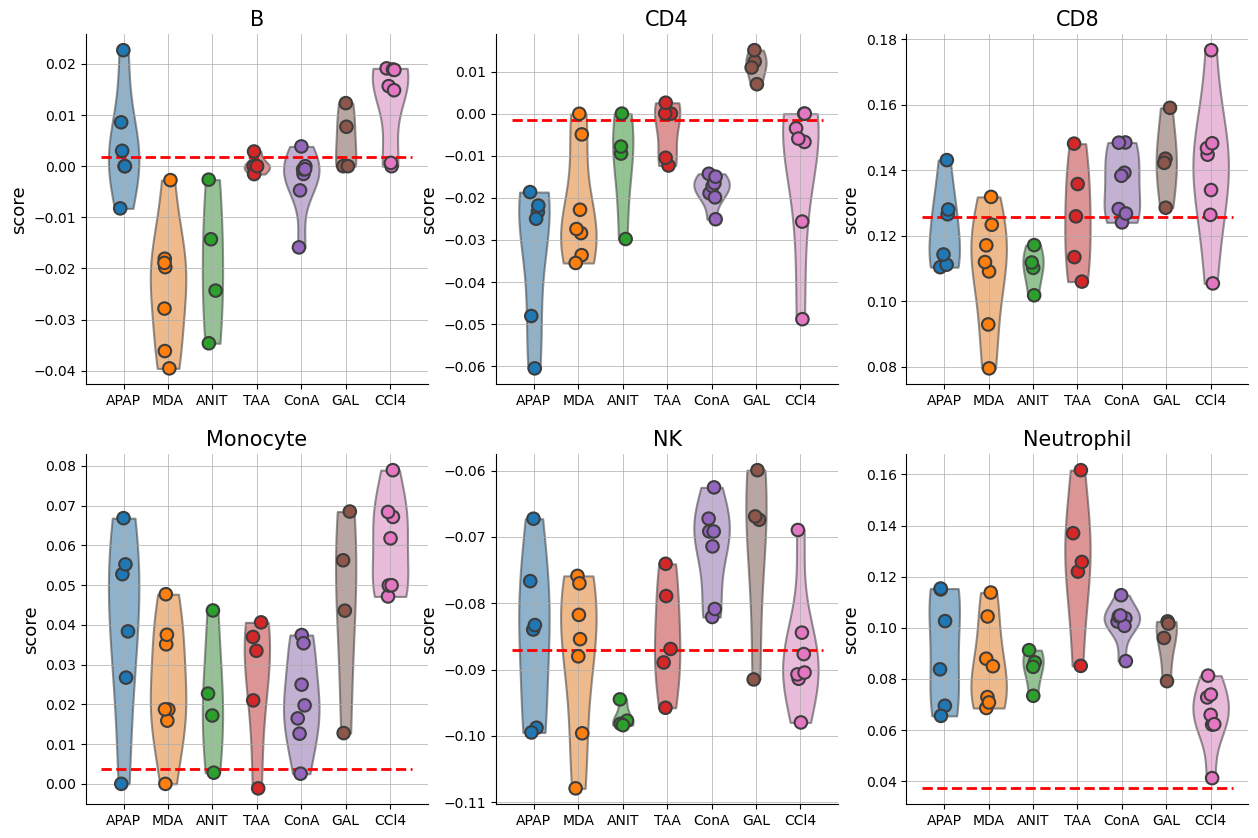

In [7]:
dat.do_fit(method="ElasticNet",alpha=1,l1_ratio=0.05)
dat.summarize(remove_list=["CIV_7","CIV_8","CIP_7","CIP_8"],
                  sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4"],
                  x_doc="",y_doc="score",ctrl="Ctrl",row_n=2,col_n=3,z_score=False)
res = dat.get_res()

***
#### 3. Validation

standardz population control
original : 57
after removing : 53
standardz population control
----------


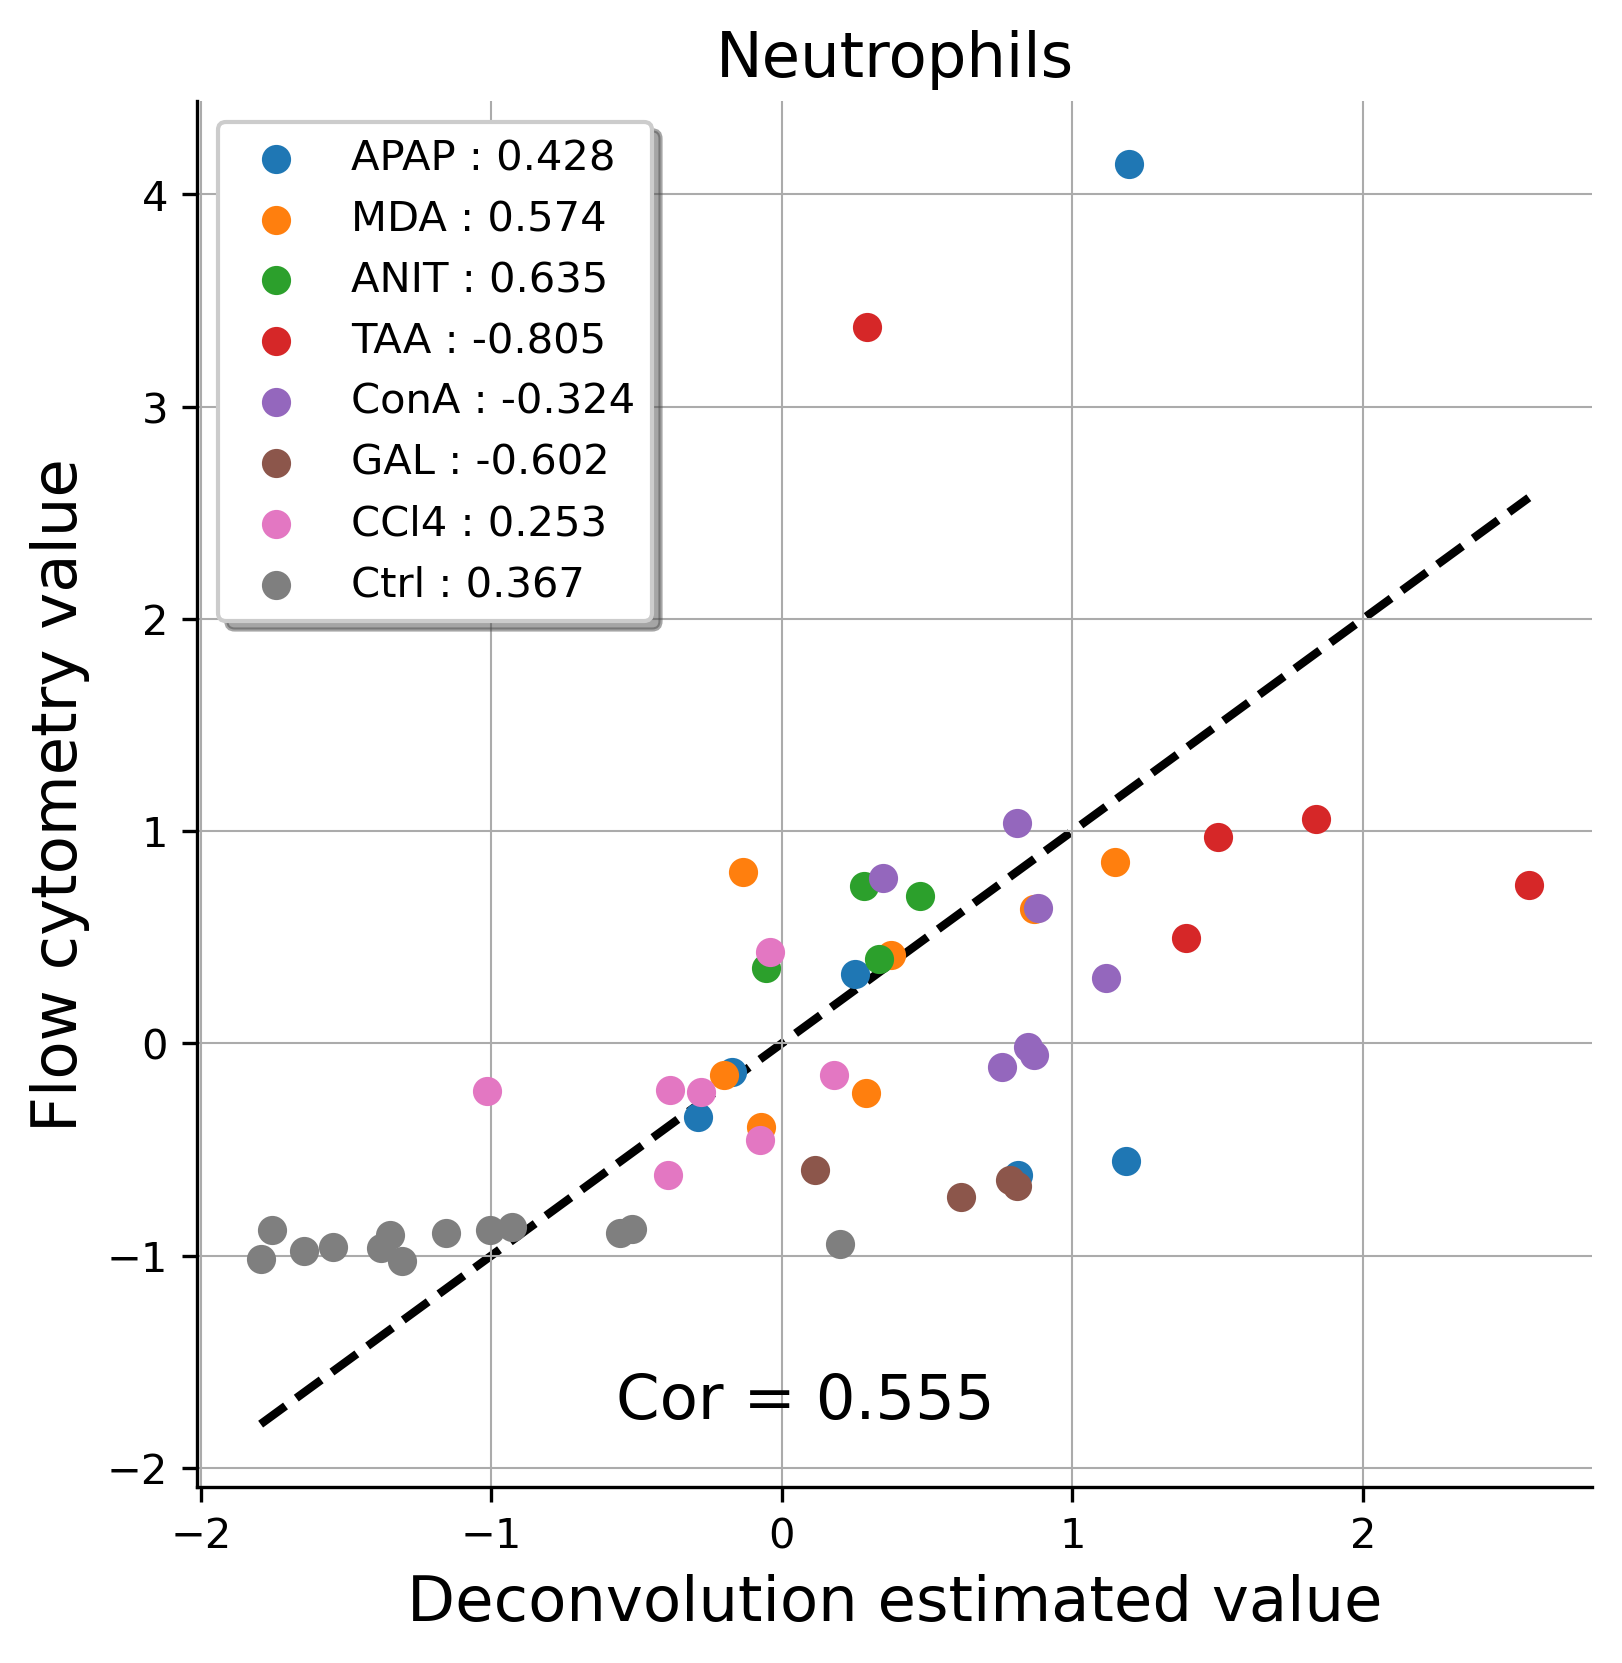

----------


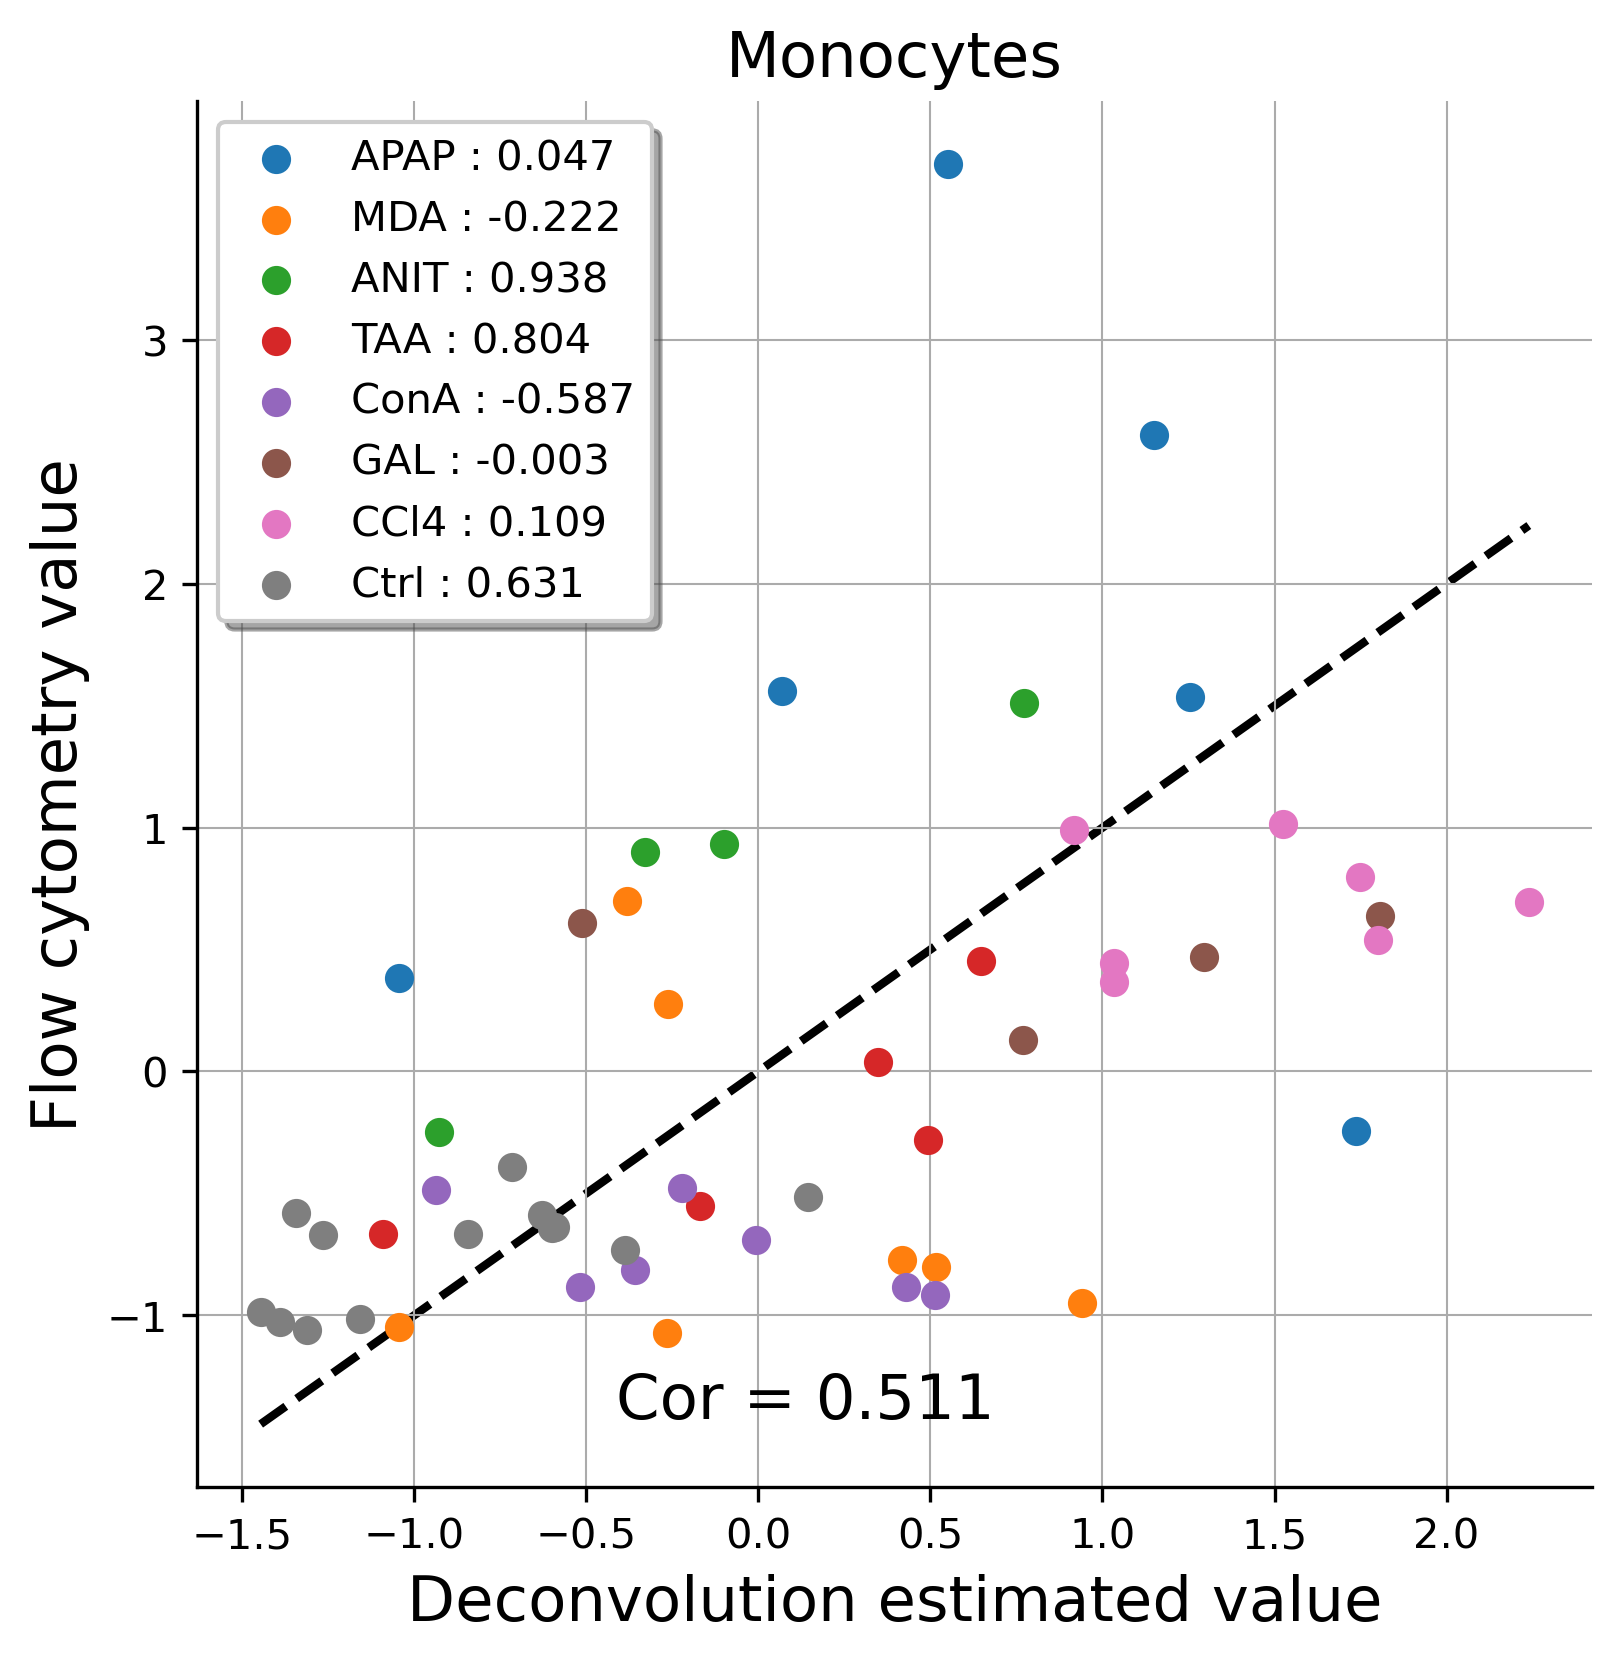

----------


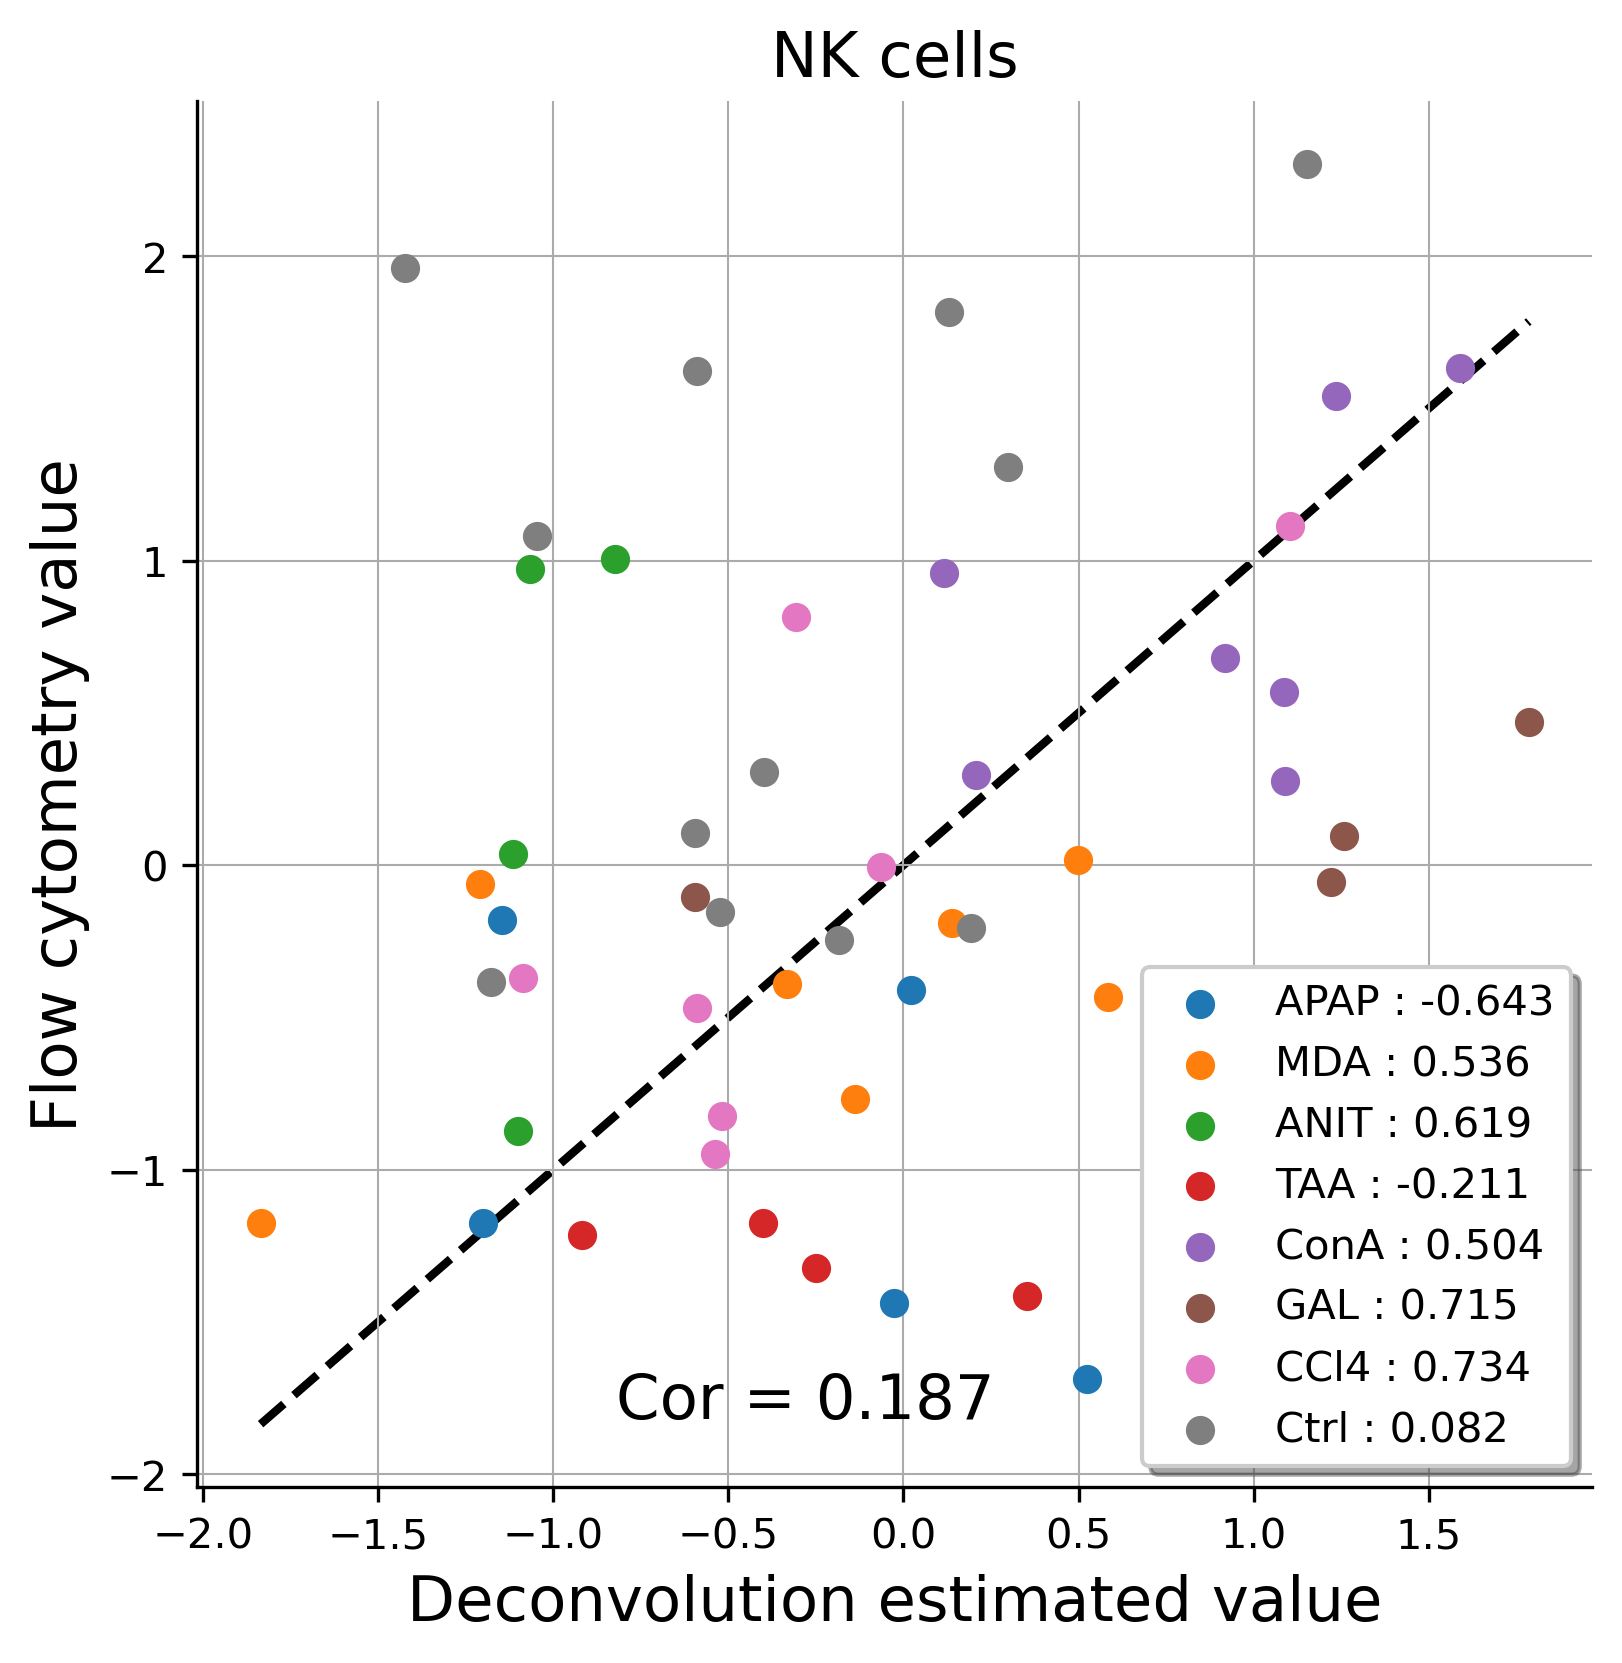

In [8]:
from Evaluation import evaluator

val_df = pd.read_csv('C:/github/LiverDeconv/Data/processed/facs_true_population.csv',index_col=0)

ev = evaluator.Evaluator()
ev.set_deconv_res(res_df=res,z_score=True)
ev.remove_samples(remove_list=["CIV_7","CIV_8","CIP_7","CIP_8"])
ev.set_validation_ref(val_df=val_df)
ev.process_validation_ref(z_score=True)

ev.evaluate(dec_names=[["Neutrophil"]],
            val_names=[["Neutrophil"]],sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4","Ctrl"],title="Neutrophils",do_plot=True,simple=False,eval_all=False,dpi=300)
ev.evaluate(dec_names=[["Monocyte"]],
            val_names=[["Monocyte"]],sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4","Ctrl"],title="Monocytes",do_plot=True,simple=False,eval_all=False,dpi=300)
ev.evaluate(dec_names=[["NK"]],
            val_names=[["NK"]],sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4","Ctrl"],title="NK cells",do_plot=True,simple=False,eval_all=False,dpi=300)

***
#### 4. Summary
- Neutrophil : 0.555
- Monocyte : 0.511
- NK : 0.187